# Saya Budiman
> Institut Teknologi Sepuluh Nopember



**Nama Anggota:**
1. Andika Rahman Teja
2. Mohammad Idris Arif Budiman
3. Rafli Raihan Pramudya

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banjirjakarta13-20/WeatherJakarta2013-2020.csv
/kaggle/input/banjirjakarta13-20/BanjirJakarta2013-2022.csv


# Data Cuaca Jakarta
[Sumber Data](https://open-meteo.com/en/docs/historical-weather-api)

In [2]:
df1 = pd.read_csv('/kaggle/input/banjirjakarta13-20/WeatherJakarta2013-2020.csv')
df1

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2013-01-01T00:00,63,28.7,23.9,25.504168,33.5,28.5,30.266663,2013-01-01T05:42,2013-01-01T18:10,26.400003,26.400003,0,22,14.3,32.4,252.23288,13.31,2.690000
1,2013-01-02T00:00,61,27.7,24.0,25.479166,31.8,28.4,30.187498,2013-01-02T05:42,2013-01-02T18:10,15.100000,15.100000,0,21,11.7,29.5,277.68045,11.73,2.450000
2,2013-01-03T00:00,51,29.8,23.8,26.645834,35.0,28.8,31.425001,2013-01-03T05:43,2013-01-03T18:11,2.400000,2.400000,0,10,16.9,35.3,262.80185,21.79,4.360001
3,2013-01-04T00:00,63,26.9,24.5,25.333330,30.9,27.6,29.145834,2013-01-04T05:43,2013-01-04T18:11,22.700000,22.700000,0,20,16.8,37.8,267.65076,10.93,2.300000
4,2013-01-05T00:00,61,27.5,23.4,25.079165,31.2,27.0,28.933334,2013-01-05T05:44,2013-01-05T18:12,11.599999,11.599999,0,20,17.2,40.7,263.79114,12.01,2.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2020-12-27T00:00,51,29.8,23.6,26.808332,35.6,28.0,31.354164,2020-12-27T05:39,2020-12-27T18:08,0.600000,0.600000,0,4,13.6,31.7,271.19348,23.18,4.750000
2918,2020-12-28T00:00,53,29.1,24.5,26.570837,34.1,28.4,30.804170,2020-12-28T05:39,2020-12-28T18:08,4.400000,4.400000,0,13,14.5,33.5,260.32034,17.67,3.720000
2919,2020-12-29T00:00,63,28.3,24.3,25.875000,33.0,28.0,29.637495,2020-12-29T05:40,2020-12-29T18:09,11.999999,11.999999,0,16,16.2,36.0,246.62689,15.90,3.320000
2920,2020-12-30T00:00,63,27.7,23.6,25.404170,31.9,27.2,29.491667,2020-12-30T05:41,2020-12-30T18:09,15.400000,15.400000,0,18,15.3,38.9,246.70422,12.59,2.590000


In [3]:
# Format Tanggal pada fitur 'time'
df1['time'] = pd.to_datetime(df1['time'], format = '%Y-%m-%dT%H:%M')

In [4]:
# Drop fitur yang tidak relevan (bukan satuan ukuran cuaca)
df1.drop(columns = ['weathercode (wmo code)', 'sunrise (iso8601)', 'sunset (iso8601)'], inplace = True)
df1

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,2013-01-01,28.7,23.9,25.504168,33.5,28.5,30.266663,26.400003,26.400003,0,22,14.3,32.4,252.23288,13.31,2.690000
1,2013-01-02,27.7,24.0,25.479166,31.8,28.4,30.187498,15.100000,15.100000,0,21,11.7,29.5,277.68045,11.73,2.450000
2,2013-01-03,29.8,23.8,26.645834,35.0,28.8,31.425001,2.400000,2.400000,0,10,16.9,35.3,262.80185,21.79,4.360001
3,2013-01-04,26.9,24.5,25.333330,30.9,27.6,29.145834,22.700000,22.700000,0,20,16.8,37.8,267.65076,10.93,2.300000
4,2013-01-05,27.5,23.4,25.079165,31.2,27.0,28.933334,11.599999,11.599999,0,20,17.2,40.7,263.79114,12.01,2.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2020-12-27,29.8,23.6,26.808332,35.6,28.0,31.354164,0.600000,0.600000,0,4,13.6,31.7,271.19348,23.18,4.750000
2918,2020-12-28,29.1,24.5,26.570837,34.1,28.4,30.804170,4.400000,4.400000,0,13,14.5,33.5,260.32034,17.67,3.720000
2919,2020-12-29,28.3,24.3,25.875000,33.0,28.0,29.637495,11.999999,11.999999,0,16,16.2,36.0,246.62689,15.90,3.320000
2920,2020-12-30,27.7,23.6,25.404170,31.9,27.2,29.491667,15.400000,15.400000,0,18,15.3,38.9,246.70422,12.59,2.590000


**Mengubah Data Daily menjadi data Monthly**

In [5]:
list (df1)

['time',
 'temperature_2m_max (°C)',
 'temperature_2m_min (°C)',
 'temperature_2m_mean (°C)',
 'apparent_temperature_max (°C)',
 'apparent_temperature_min (°C)',
 'apparent_temperature_mean (°C)',
 'precipitation_sum (mm)',
 'rain_sum (mm)',
 'snowfall_sum (cm)',
 'precipitation_hours (h)',
 'windspeed_10m_max (km/h)',
 'windgusts_10m_max (km/h)',
 'winddirection_10m_dominant (°)',
 'shortwave_radiation_sum (MJ/m²)',
 'et0_fao_evapotranspiration (mm)']

In [6]:
columns_mean = ['time',
                'temperature_2m_max (°C)',
                'temperature_2m_min (°C)',
                'temperature_2m_mean (°C)',
                'apparent_temperature_max (°C)',
                'apparent_temperature_min (°C)',
                'apparent_temperature_mean (°C)',
                'windspeed_10m_max (km/h)',
                'windgusts_10m_max (km/h)',
                'winddirection_10m_dominant (°)']
columns_sum = ['time',
               'precipitation_sum (mm)',
               'rain_sum (mm)',
               'snowfall_sum (cm)',
               'shortwave_radiation_sum (MJ/m²)',
               'et0_fao_evapotranspiration (mm)']
monthly_mean = df1[columns_mean]
monthly_sum = df1[columns_sum]

monthly_mean_1 = monthly_mean.groupby(pd.Grouper(key='time', freq='M')).mean()
monthly_sum_1 = monthly_sum.groupby(pd.Grouper(key='time', freq='M')).sum()

Dipisahkan menjadi 2 Dataframe, yakni monthly_mean dan monthly_sum

- Pada monthly_sum, dipilih fitur yang jika diubah pada frekuensi bulanan nilainya akan bertambah (misal curah hujan, curah salju, radiasi matahari, dan penguapan air (evaporasi))

- Pada monthly_mean, dipilih fitur yang jika diubah pada frekuensi bulanan nilainya berdasarkan nilai rata-ratanya (misal suhu udara dan kecepatan angin)

In [7]:
monthly_mean_1

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
time,,,,,,,,,
2013-01-31,27.916129,23.683871,25.443414,32.574194,27.745161,29.804570,15.206452,35.332258,272.750786
2013-02-28,28.775000,23.700000,25.888541,34.503571,28.057143,30.650149,13.378571,32.932143,239.408484
2013-03-31,29.696774,23.841935,26.435350,35.948387,28.422581,31.548925,12.051613,27.251613,227.823620
2013-04-30,29.550000,23.993333,26.373472,35.790000,28.883333,31.646110,10.673333,24.936667,175.896197
2013-05-31,29.625806,23.783871,26.346909,35.767742,28.612903,31.640860,9.832258,23.716129,171.293819
...,...,...,...,...,...,...,...,...,...
2020-08-31,30.896774,23.777419,27.082930,35.664516,28.151613,31.403763,13.267742,27.590323,61.508978
2020-09-30,31.486667,23.980000,27.379305,36.880000,28.443333,31.969027,12.360000,27.453333,133.417609
2020-10-31,30.722581,24.183871,27.021506,36.719355,28.912903,31.999597,10.329032,25.103226,173.535034


In [8]:
# drop nilai yang tidak perlu (karena sudah ada alternatifnya)
monthly_mean_1.drop (columns = ['temperature_2m_max (°C)', 'temperature_2m_min (°C)', 
                               'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)'],
                     inplace = True)
monthly_mean_1

,temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
time,,,,,
2013-01-31,25.443414,29.804570,15.206452,35.332258,272.750786
2013-02-28,25.888541,30.650149,13.378571,32.932143,239.408484
2013-03-31,26.435350,31.548925,12.051613,27.251613,227.823620
2013-04-30,26.373472,31.646110,10.673333,24.936667,175.896197
2013-05-31,26.346909,31.640860,9.832258,23.716129,171.293819
...,...,...,...,...,...
2020-08-31,27.082930,31.403763,13.267742,27.590323,61.508978
2020-09-30,27.379305,31.969027,12.360000,27.453333,133.417609
2020-10-31,27.021506,31.999597,10.329032,25.103226,173.535034


In [9]:
monthly_sum_1

,precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
time,,,,,
2013-01-31,394.299993,394.299993,0,448.76,91.719999
2013-02-28,261.800007,261.800007,0,504.85,101.590002
2013-03-31,212.100003,212.100003,0,626.59,126.370003
2013-04-30,282.500007,282.500007,0,517.76,105.409999
2013-05-31,176.199996,176.199996,0,528.50,107.109999
...,...,...,...,...,...
2020-08-31,49.500000,49.500000,0,633.73,135.980008
2020-09-30,54.000000,54.000000,0,661.92,142.090004
2020-10-31,207.800000,207.800000,0,628.86,132.230006


In [10]:
# cek nilai 'snowfall_sum'
monthly_sum_1['snowfall_sum (cm)'].unique()

array([0])

In [11]:
# cek apakah nilai 'precipitation_sum (mm)' sama dengan 'rain_sum (mm)'
if (monthly_sum_1['precipitation_sum (mm)'] == monthly_sum_1['rain_sum (mm)']).all():
  print ('Semua nilainya sama, mereka fitur yang kembar')
else:
  print ('Mereka bukan fitur yang kembar')

Semua nilainya sama, mereka fitur yang kembar


In [12]:
# drop nilai yang tidak perlu
monthly_sum_1.drop(columns = ['precipitation_sum (mm)', 'snowfall_sum (cm)'], inplace = True)
monthly_sum_1

,rain_sum (mm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
time,,,
2013-01-31,394.299993,448.76,91.719999
2013-02-28,261.800007,504.85,101.590002
2013-03-31,212.100003,626.59,126.370003
2013-04-30,282.500007,517.76,105.409999
2013-05-31,176.199996,528.50,107.109999
...,...,...,...
2020-08-31,49.500000,633.73,135.980008
2020-09-30,54.000000,661.92,142.090004
2020-10-31,207.800000,628.86,132.230006


**Menggabungkan nilai data mean dan sum**

In [13]:
df1 = pd.concat([monthly_sum_1, monthly_mean_1], axis = 1)
df1

,rain_sum (mm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
time,,,,,,,,
2013-01-31,394.299993,448.76,91.719999,25.443414,29.804570,15.206452,35.332258,272.750786
2013-02-28,261.800007,504.85,101.590002,25.888541,30.650149,13.378571,32.932143,239.408484
2013-03-31,212.100003,626.59,126.370003,26.435350,31.548925,12.051613,27.251613,227.823620
2013-04-30,282.500007,517.76,105.409999,26.373472,31.646110,10.673333,24.936667,175.896197
2013-05-31,176.199996,528.50,107.109999,26.346909,31.640860,9.832258,23.716129,171.293819
...,...,...,...,...,...,...,...,...
2020-08-31,49.500000,633.73,135.980008,27.082930,31.403763,13.267742,27.590323,61.508978
2020-09-30,54.000000,661.92,142.090004,27.379305,31.969027,12.360000,27.453333,133.417609
2020-10-31,207.800000,628.86,132.230006,27.021506,31.999597,10.329032,25.103226,173.535034


In [14]:
df1.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [15]:
# buat kolom waktu
dates = ['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31']
df_waktu = pd.DataFrame({'Time': dates})
df_waktu

,Time
0,2013-01-31
1,2013-02-28
2,2013-03-31
3,2013-04-30
4,2013-05-31
...,...
91,2020-08-31
92,2020-09-30
93,2020-10-31
94,2020-11-30


In [16]:
df1.reset_index(drop = True, inplace = True)
df1 = pd.concat([df_waktu, df1], axis = 1)
df1

,Time,rain_sum (mm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
0,2013-01-31,394.299993,448.76,91.719999,25.443414,29.804570,15.206452,35.332258,272.750786
1,2013-02-28,261.800007,504.85,101.590002,25.888541,30.650149,13.378571,32.932143,239.408484
2,2013-03-31,212.100003,626.59,126.370003,26.435350,31.548925,12.051613,27.251613,227.823620
3,2013-04-30,282.500007,517.76,105.409999,26.373472,31.646110,10.673333,24.936667,175.896197
4,2013-05-31,176.199996,528.50,107.109999,26.346909,31.640860,9.832258,23.716129,171.293819
...,...,...,...,...,...,...,...,...,...
91,2020-08-31,49.500000,633.73,135.980008,27.082930,31.403763,13.267742,27.590323,61.508978
92,2020-09-30,54.000000,661.92,142.090004,27.379305,31.969027,12.360000,27.453333,133.417609
93,2020-10-31,207.800000,628.86,132.230006,27.021506,31.999597,10.329032,25.103226,173.535034
94,2020-11-30,146.999998,574.87,119.060001,26.659861,31.720695,11.416667,27.240000,171.293529


# Data Banjir Jakarta
[Sumber Data](https://data.jakarta.go.id/dataset/rekapitulasi-kejadian-banjir-pertahun)

In [17]:
df2 = pd.read_csv('/kaggle/input/banjirjakarta13-20/BanjirJakarta2013-2022.csv')
df2

,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,jumlah_jiwa_pengungsi_tertinggi,nilai minimal,nilai maksimal,panjang jangkauan,nilai rata-rata
0,15.0,2414.0,506164.0,1226487.0,83554.0,10.0,400.0,390.0,205.0
1,8.0,207.0,19177.0,46865.0,740.0,10.0,175.0,165.0,92.5
2,2.0,68.0,9215.0,27020.0,2406.0,10.0,250.0,240.0,130.0
3,4.0,66.0,6004.0,15060.0,318.0,10.0,100.0,90.0,55.0
4,3.0,139.0,4740.0,18481.0,1245.0,0.0,160.0,160.0,80.0
...,...,...,...,...,...,...,...,...,...
91,1.0,20.0,0.0,0.0,0.0,10.0,80.0,70.0,45.0
92,2.0,65.0,414.0,1300.0,104.0,10.0,130.0,120.0,70.0
93,2.0,170.0,1933.0,6250.0,675.0,10.0,180.0,170.0,95.0
94,2.0,54.0,0.0,0.0,0.0,10.0,60.0,50.0,35.0


In [18]:
df2.rename(columns = {'nilai minimal':'ketinggian_air_min', 
                      'nilai maksimal': 'ketinggian_air_max',
                      'panjang jangkauan':'jangkauan_ketinggian_air',
                      'nilai rata-rata': 'ketinggian_air_mean'}, inplace = True)
df2

,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,jumlah_jiwa_pengungsi_tertinggi,ketinggian_air_min,ketinggian_air_max,jangkauan_ketinggian_air,ketinggian_air_mean
0,15.0,2414.0,506164.0,1226487.0,83554.0,10.0,400.0,390.0,205.0
1,8.0,207.0,19177.0,46865.0,740.0,10.0,175.0,165.0,92.5
2,2.0,68.0,9215.0,27020.0,2406.0,10.0,250.0,240.0,130.0
3,4.0,66.0,6004.0,15060.0,318.0,10.0,100.0,90.0,55.0
4,3.0,139.0,4740.0,18481.0,1245.0,0.0,160.0,160.0,80.0
...,...,...,...,...,...,...,...,...,...
91,1.0,20.0,0.0,0.0,0.0,10.0,80.0,70.0,45.0
92,2.0,65.0,414.0,1300.0,104.0,10.0,130.0,120.0,70.0
93,2.0,170.0,1933.0,6250.0,675.0,10.0,180.0,170.0,95.0
94,2.0,54.0,0.0,0.0,0.0,10.0,60.0,50.0,35.0


In [19]:
list(df2)

['lama_genangan',
 'rw_terdampak',
 'kk_terdampak',
 'jiwa_terdampak',
 'jumlah_jiwa_pengungsi_tertinggi',
 'ketinggian_air_min',
 'ketinggian_air_max',
 'jangkauan_ketinggian_air',
 'ketinggian_air_mean']

**Penggabungan df1 dan df2**

In [20]:
df = pd.concat([df1, df2], axis = 1)
df

,Time,rain_sum (mm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,jumlah_jiwa_pengungsi_tertinggi,ketinggian_air_min,ketinggian_air_max,jangkauan_ketinggian_air,ketinggian_air_mean
0,2013-01-31,394.299993,448.76,91.719999,25.443414,29.804570,15.206452,35.332258,272.750786,15.0,2414.0,506164.0,1226487.0,83554.0,10.0,400.0,390.0,205.0
1,2013-02-28,261.800007,504.85,101.590002,25.888541,30.650149,13.378571,32.932143,239.408484,8.0,207.0,19177.0,46865.0,740.0,10.0,175.0,165.0,92.5
2,2013-03-31,212.100003,626.59,126.370003,26.435350,31.548925,12.051613,27.251613,227.823620,2.0,68.0,9215.0,27020.0,2406.0,10.0,250.0,240.0,130.0
3,2013-04-30,282.500007,517.76,105.409999,26.373472,31.646110,10.673333,24.936667,175.896197,4.0,66.0,6004.0,15060.0,318.0,10.0,100.0,90.0,55.0
4,2013-05-31,176.199996,528.50,107.109999,26.346909,31.640860,9.832258,23.716129,171.293819,3.0,139.0,4740.0,18481.0,1245.0,0.0,160.0,160.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-08-31,49.500000,633.73,135.980008,27.082930,31.403763,13.267742,27.590323,61.508978,1.0,20.0,0.0,0.0,0.0,10.0,80.0,70.0,45.0
92,2020-09-30,54.000000,661.92,142.090004,27.379305,31.969027,12.360000,27.453333,133.417609,2.0,65.0,414.0,1300.0,104.0,10.0,130.0,120.0,70.0
93,2020-10-31,207.800000,628.86,132.230006,27.021506,31.999597,10.329032,25.103226,173.535034,2.0,170.0,1933.0,6250.0,675.0,10.0,180.0,170.0,95.0
94,2020-11-30,146.999998,574.87,119.060001,26.659861,31.720695,11.416667,27.240000,171.293529,2.0,54.0,0.0,0.0,0.0,10.0,60.0,50.0,35.0


# EDA & Visualisasi Data

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time                             96 non-null     object 
 1   rain_sum (mm)                    96 non-null     float64
 2   shortwave_radiation_sum (MJ/m²)  96 non-null     float64
 3   et0_fao_evapotranspiration (mm)  96 non-null     float64
 4   temperature_2m_mean (°C)         96 non-null     float64
 5   apparent_temperature_mean (°C)   96 non-null     float64
 6   windspeed_10m_max (km/h)         96 non-null     float64
 7   windgusts_10m_max (km/h)         96 non-null     float64
 8   winddirection_10m_dominant (°)   96 non-null     float64
 9   lama_genangan                    92 non-null     float64
 10  rw_terdampak                     92 non-null     float64
 11  kk_terdampak                     89 non-null     float64
 12  jiwa_terdampak          

In [23]:
# Coba di drop nilai NaN nya
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 95
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time                             87 non-null     object 
 1   rain_sum (mm)                    87 non-null     float64
 2   shortwave_radiation_sum (MJ/m²)  87 non-null     float64
 3   et0_fao_evapotranspiration (mm)  87 non-null     float64
 4   temperature_2m_mean (°C)         87 non-null     float64
 5   apparent_temperature_mean (°C)   87 non-null     float64
 6   windspeed_10m_max (km/h)         87 non-null     float64
 7   windgusts_10m_max (km/h)         87 non-null     float64
 8   winddirection_10m_dominant (°)   87 non-null     float64
 9   lama_genangan                    87 non-null     float64
 10  rw_terdampak                     87 non-null     float64
 11  kk_terdampak                     87 non-null     float64
 12  jiwa_terdampak          

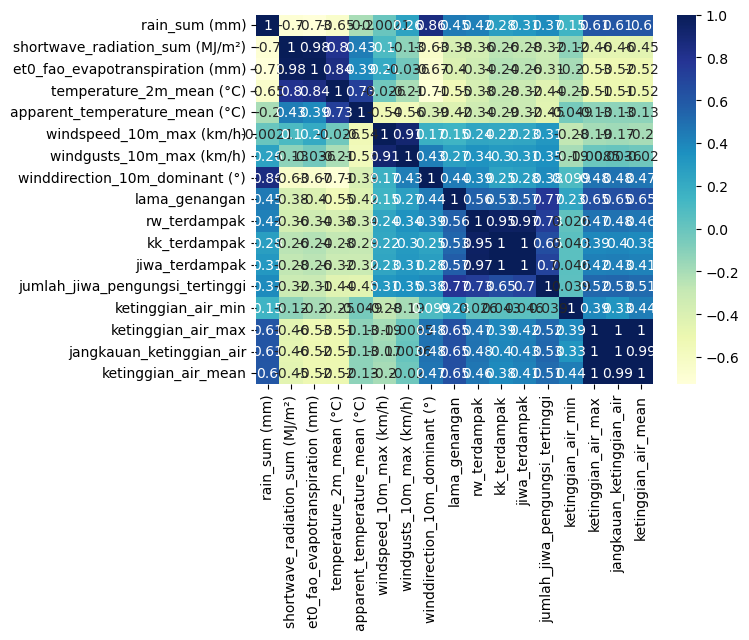

In [24]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize':(20,20)})

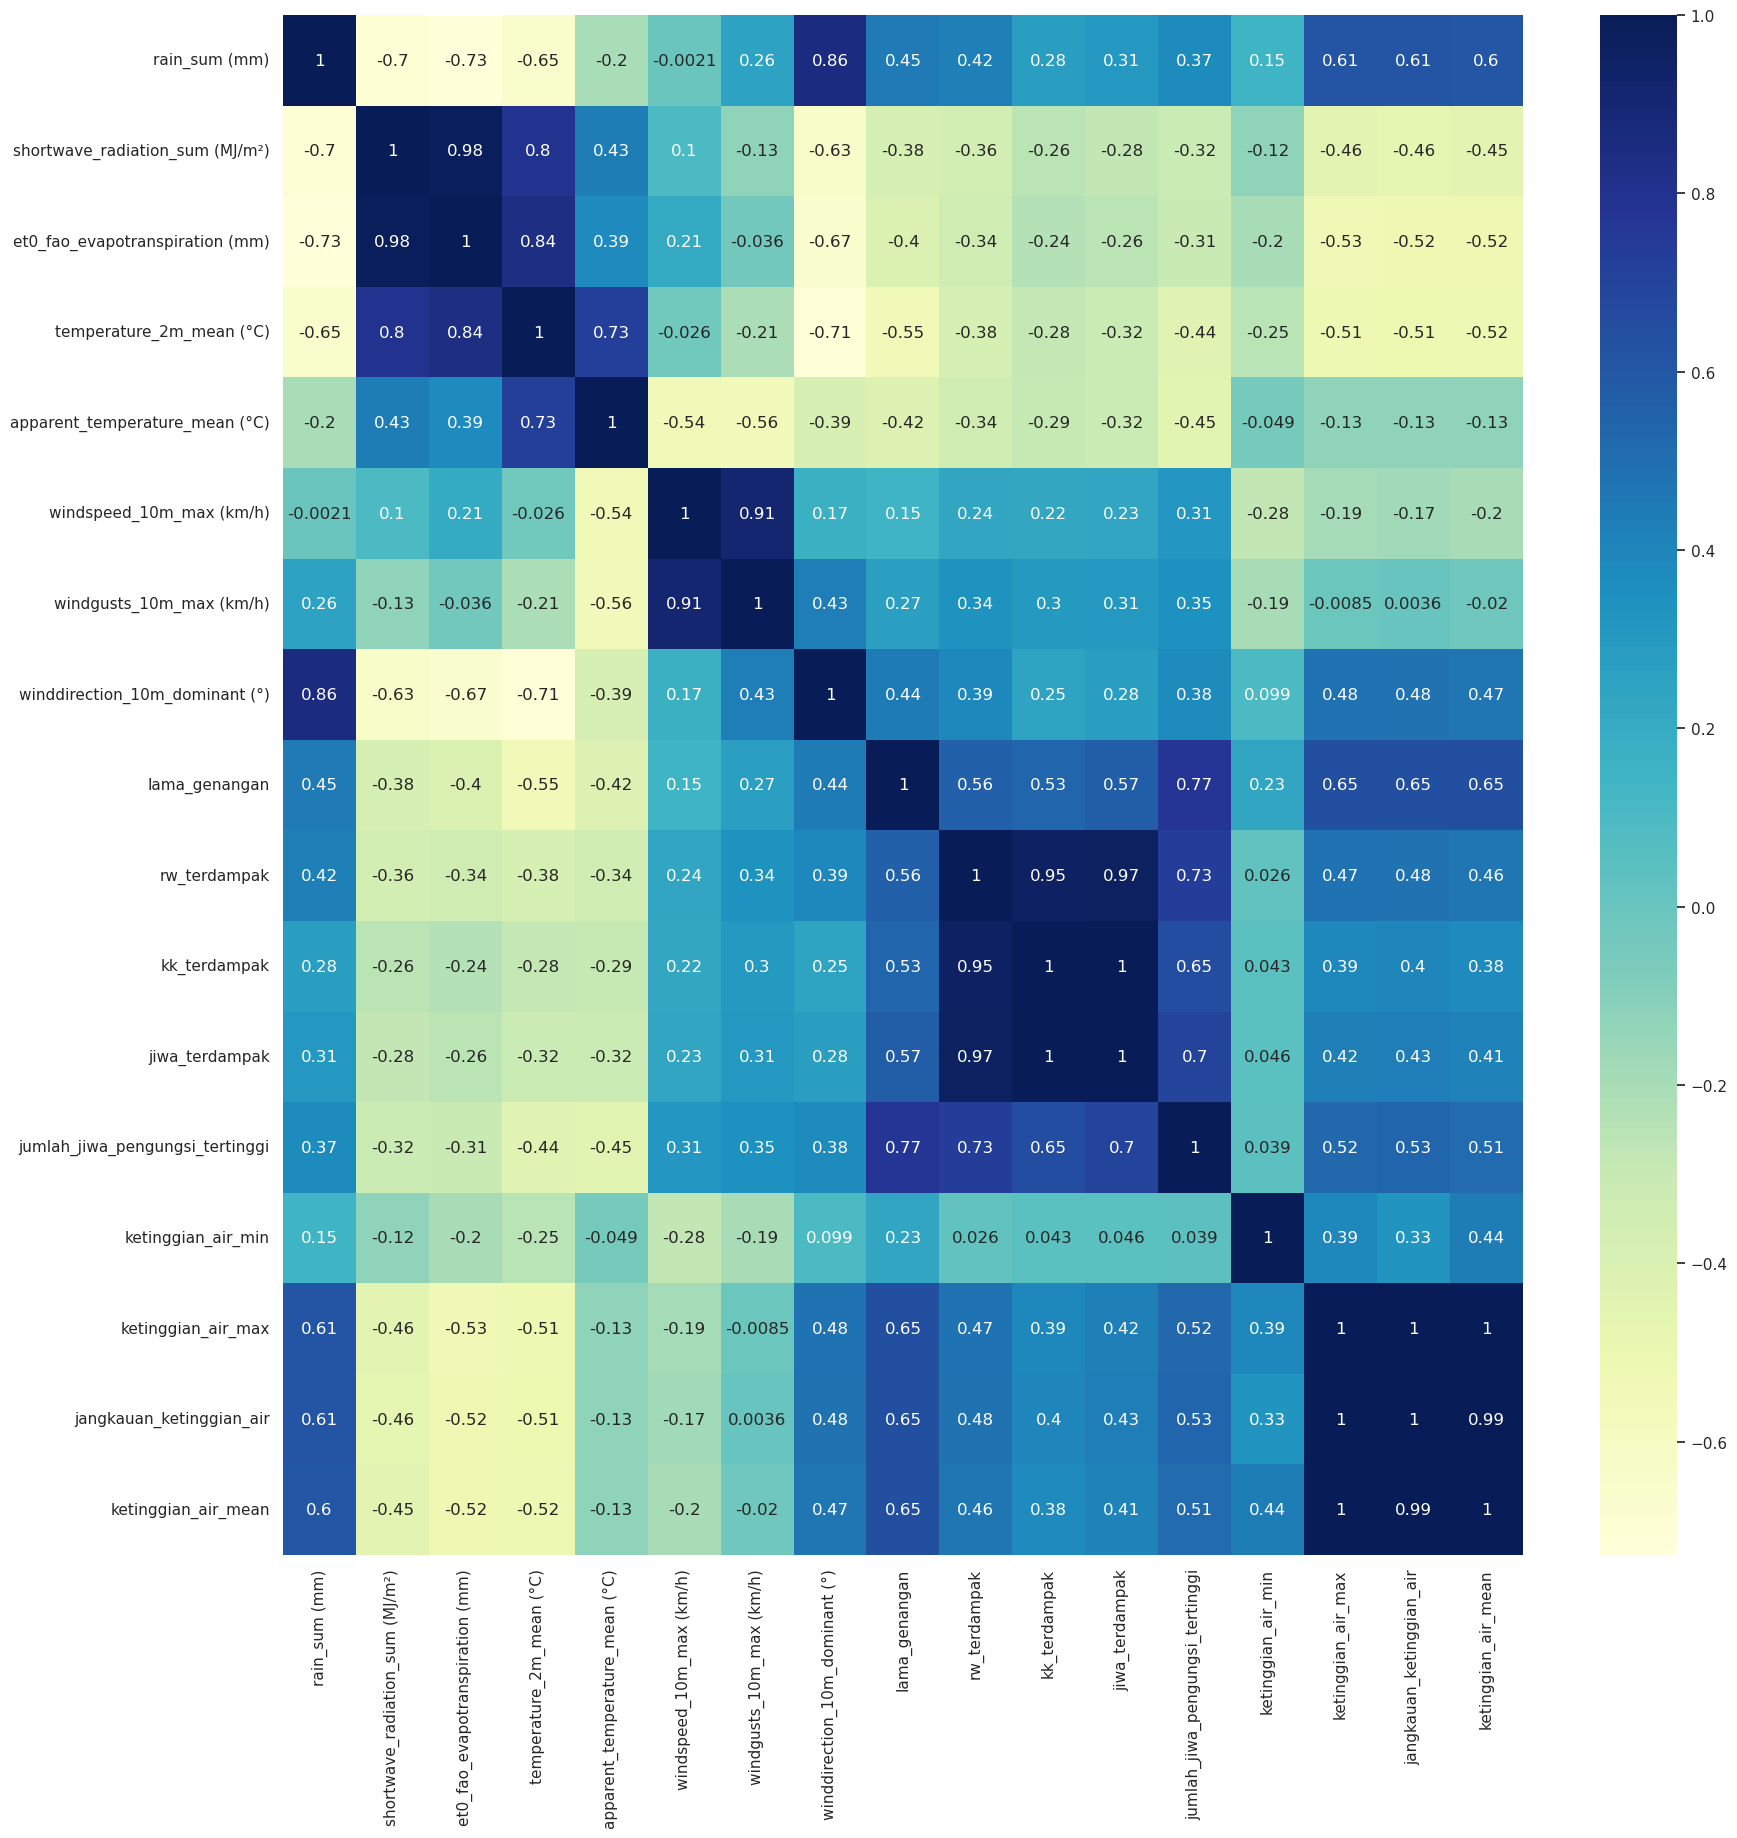

In [25]:
# agar gambar heatmap terlihat bagus
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc={'figure.figsize':(20,20)})
plt.savefig('Heatmap.png')

**Beberapa fitur yang akan di drop**

- RW terdampak, KK terdampak, jiwa terdampak
> Karena akan dilakukan klasifikasi rentang jumlah pengungsi tertinggi berdasarkan data cuaca dan kondisi lingkungan saat banjir menimpa

- Ketinggian minimal dan maksimal air banjir
> Karena sudah dapat direpresentasikan / digantikan dengan nilai rata-rata ketinggian air banjir

- Jangkauan ketinggian air
> Karena nilainya kurang relevan dan ambigu

- Shortwave radiation, evapotranspiration, windspeed
> Nilai korelasi rendah dibanding fitur lainnya

In [26]:
# drop fitur yang tidak digunakan
kolom = ['rw_terdampak','kk_terdampak', 'jiwa_terdampak', 
         'ketinggian_air_min','ketinggian_air_max', 'jangkauan_ketinggian_air',
         'shortwave_radiation_sum (MJ/m²)', 'et0_fao_evapotranspiration (mm)',
         'windspeed_10m_max (km/h)']
df.drop(columns = kolom, inplace = True)
df

,Time,rain_sum (mm),temperature_2m_mean (°C),apparent_temperature_mean (°C),windgusts_10m_max (km/h),winddirection_10m_dominant (°),lama_genangan,jumlah_jiwa_pengungsi_tertinggi,ketinggian_air_mean
0,2013-01-31,394.299993,25.443414,29.804570,35.332258,272.750786,15.0,83554.0,205.0
1,2013-02-28,261.800007,25.888541,30.650149,32.932143,239.408484,8.0,740.0,92.5
2,2013-03-31,212.100003,26.435350,31.548925,27.251613,227.823620,2.0,2406.0,130.0
3,2013-04-30,282.500007,26.373472,31.646110,24.936667,175.896197,4.0,318.0,55.0
4,2013-05-31,176.199996,26.346909,31.640860,23.716129,171.293819,3.0,1245.0,80.0
...,...,...,...,...,...,...,...,...,...
91,2020-08-31,49.500000,27.082930,31.403763,27.590323,61.508978,1.0,0.0,45.0
92,2020-09-30,54.000000,27.379305,31.969027,27.453333,133.417609,2.0,104.0,70.0
93,2020-10-31,207.800000,27.021506,31.999597,25.103226,173.535034,2.0,675.0,95.0
94,2020-11-30,146.999998,26.659861,31.720695,27.240000,171.293529,2.0,0.0,35.0


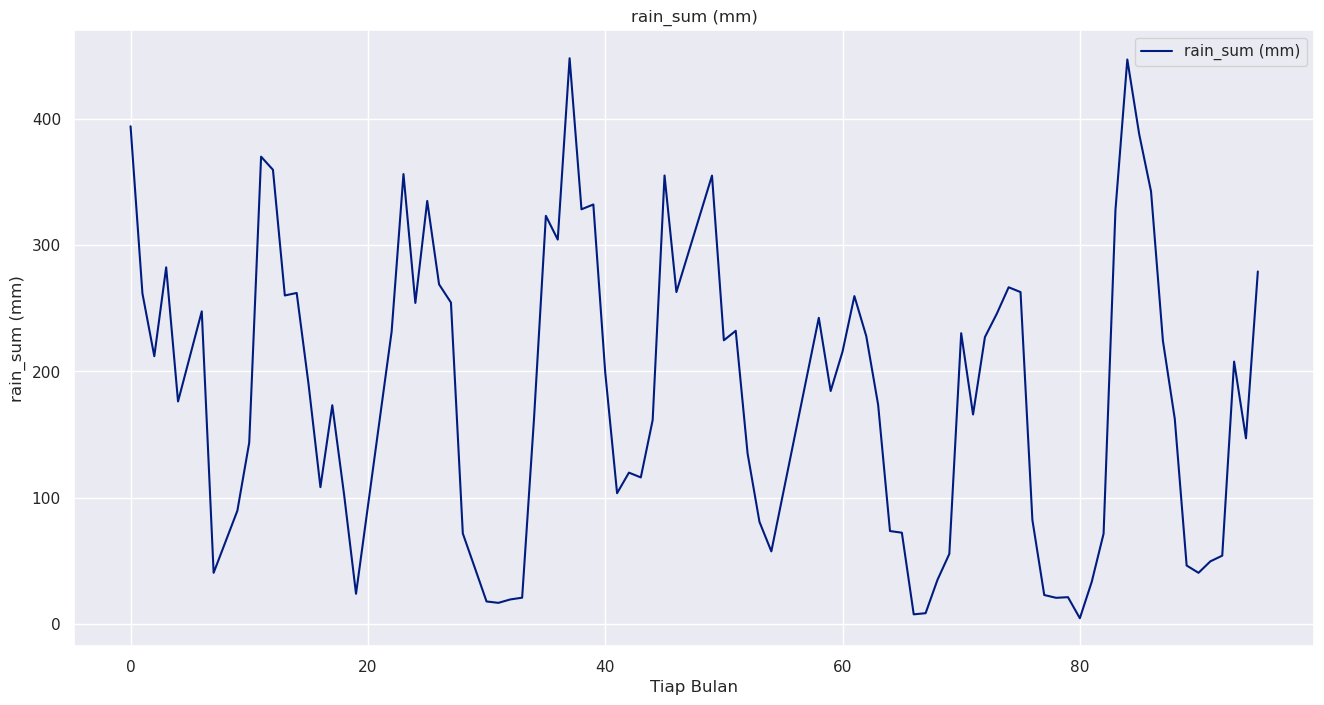

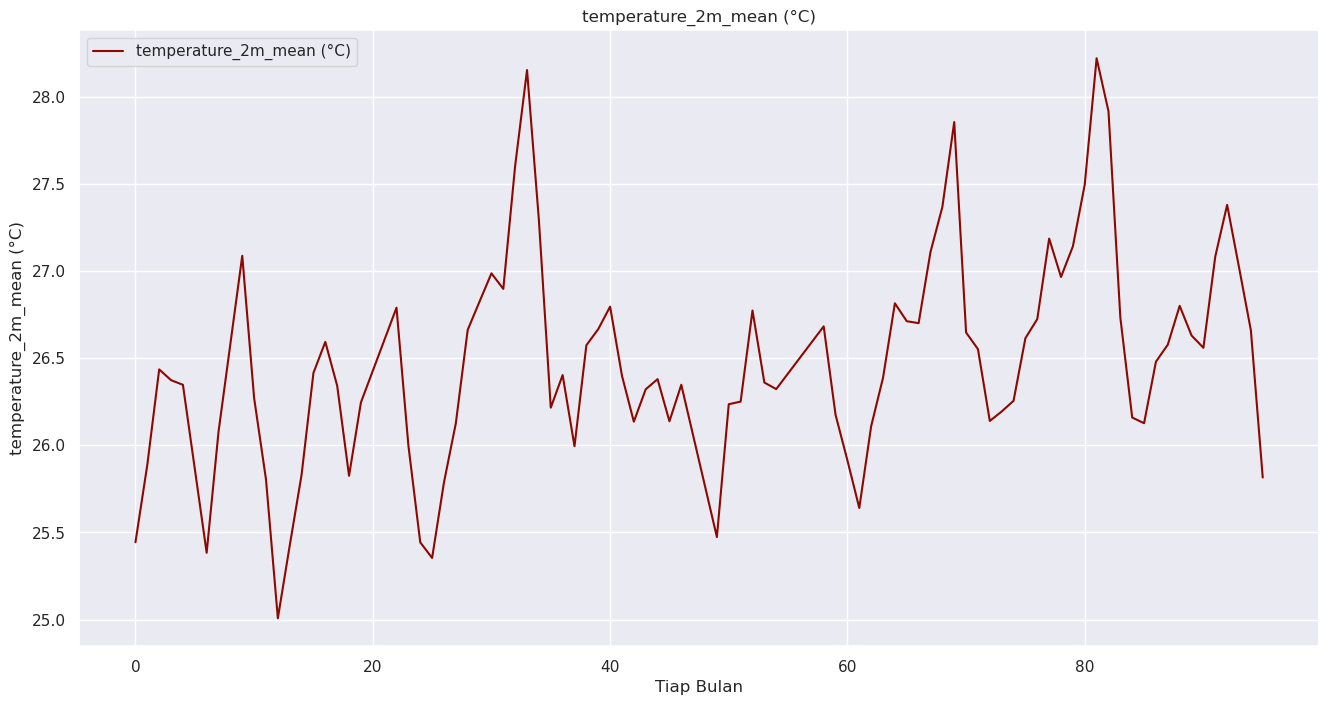

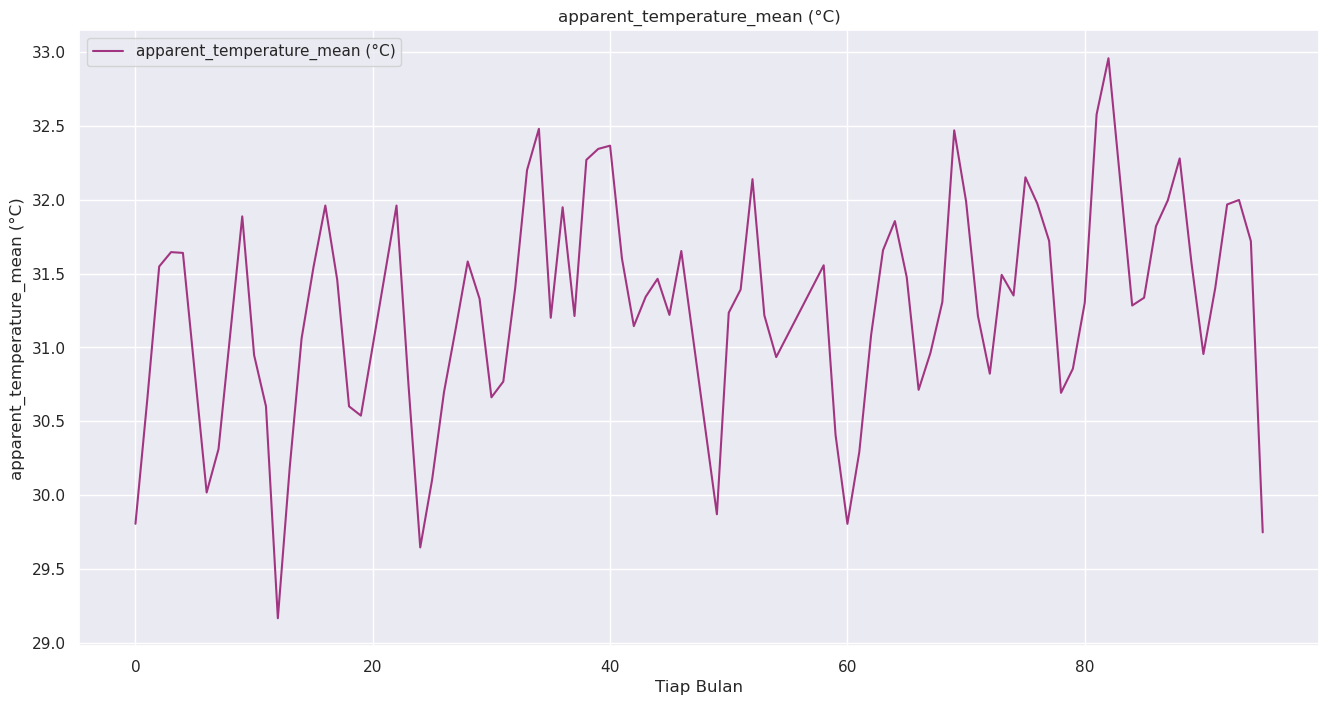

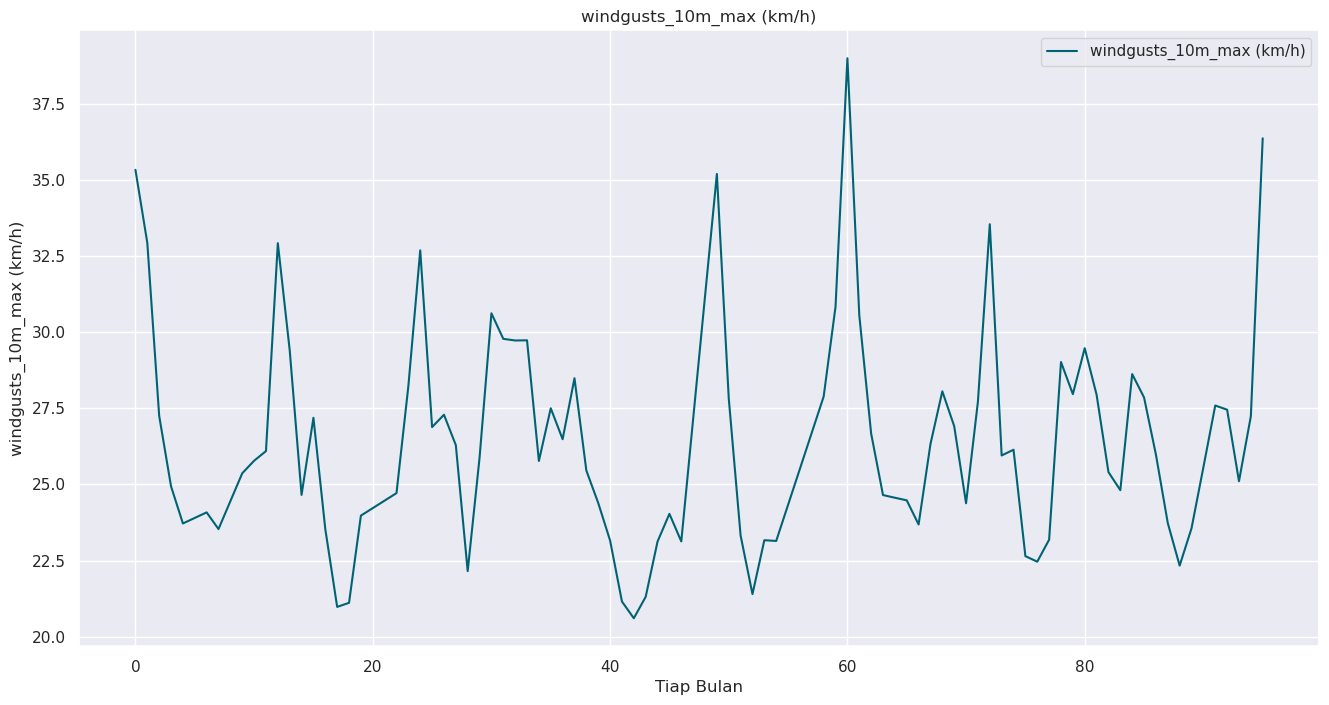

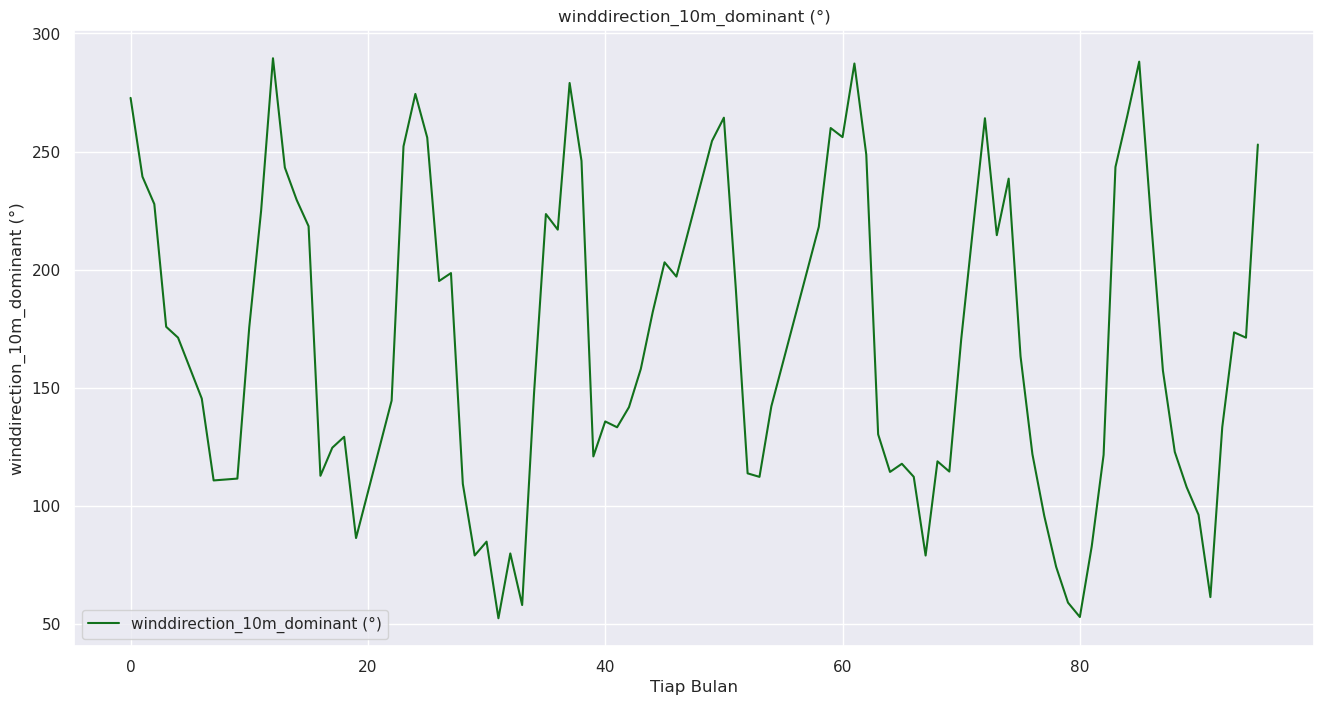

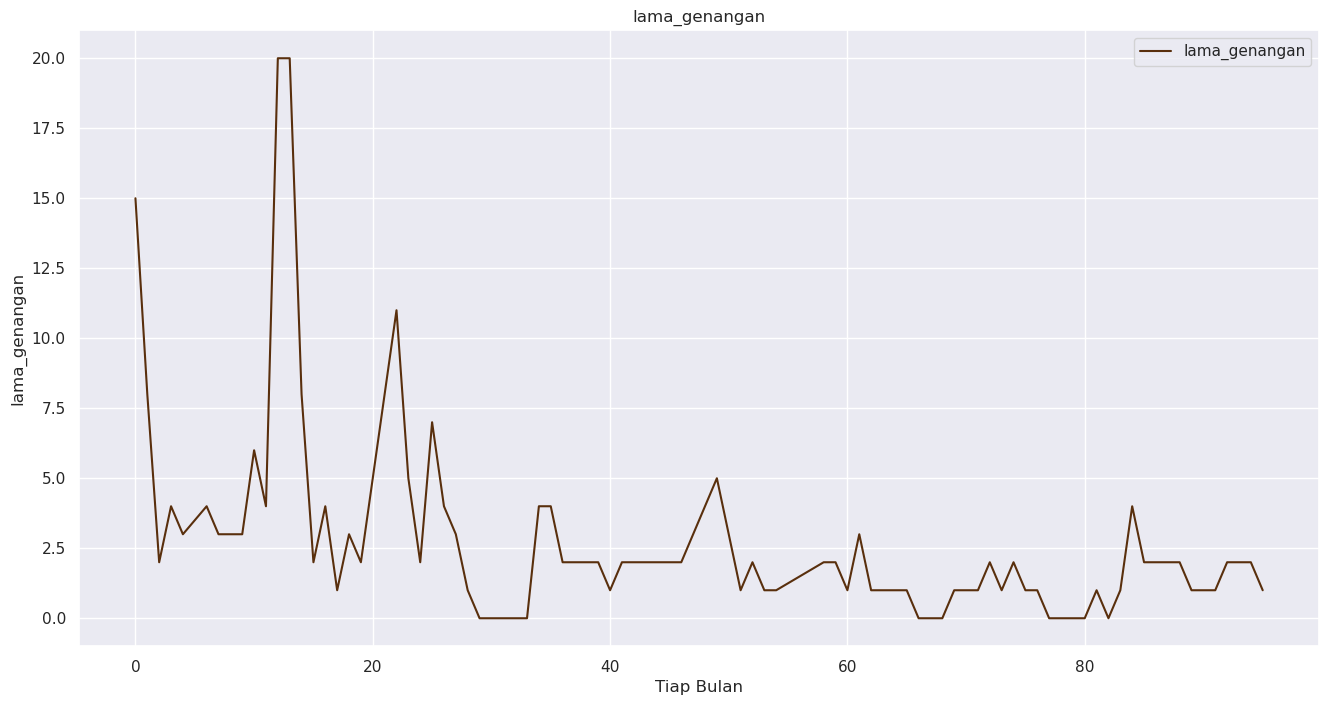

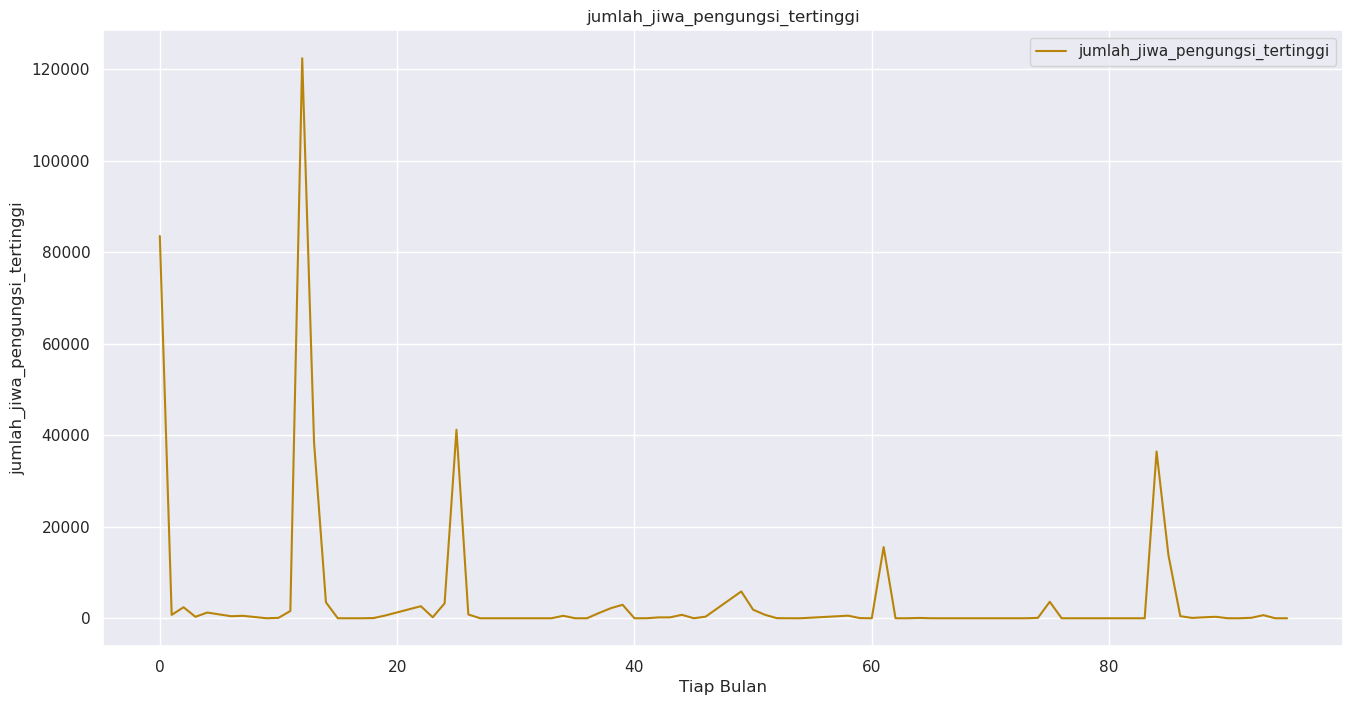

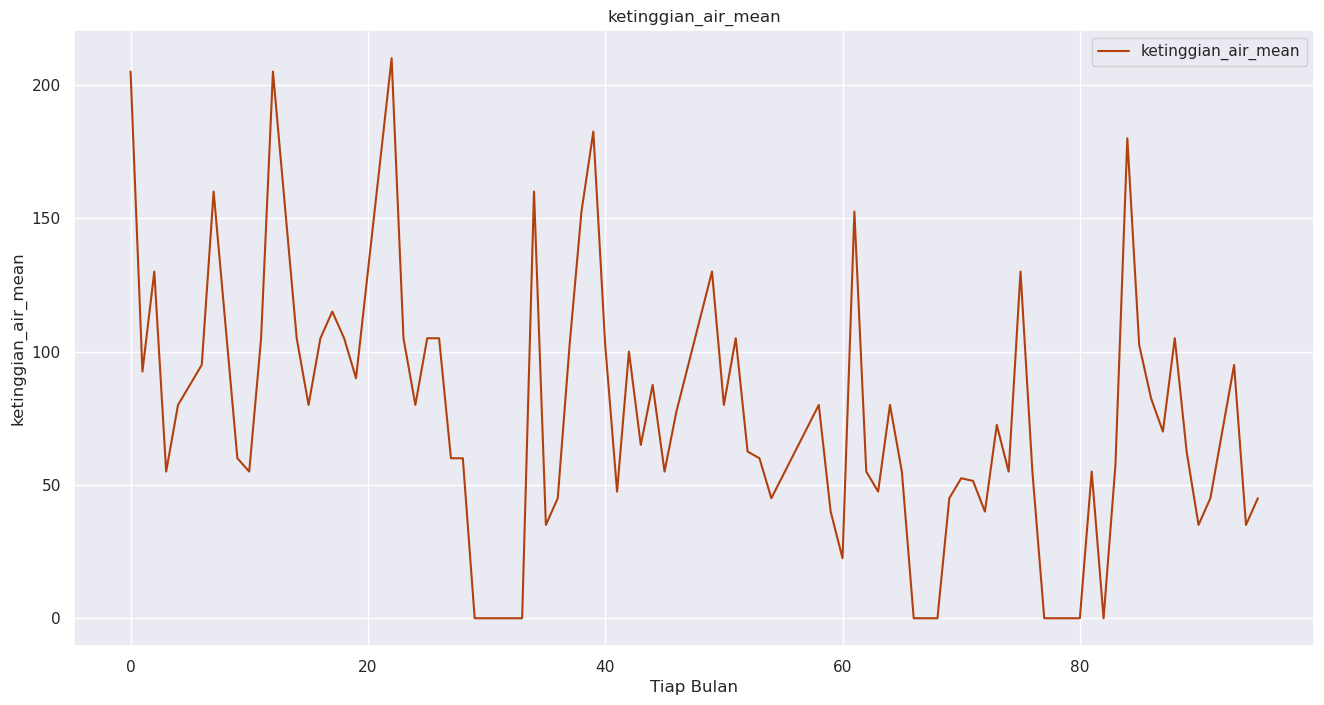

In [27]:
df_grafik = df.drop(columns = ['Time'])

sns.set(rc={'figure.figsize':(16,8)})
for i, col in enumerate(list(df_grafik)):
    sns.lineplot (x = df.index, y = col, data = df_grafik, label = col, color=sns.color_palette('dark', len(df_grafik))[i*3])
    plt.title(col)
    plt.xlabel('Tiap Bulan')
    plt.show()

In [28]:
df.to_csv('Data_Final_BanjirJakarta2013-2020.csv', index = False)
df.to_excel('Data_Final_BanjirJakarta2013-2020.xlsx', index = False)

# Membuat kategori jumlah pengungsi

- Kategori 0 = Tidak ada pengungsi (0 jiwa)
- Kategori 1 = Terdapat beberapa pengungsi (1 - 1100 jiwa)
- Kategori 2 = Terdapat banyak pengungsi (> 1100 jiwa)

> Mengapa 1100? Karena jumlah tersebut merupakan 0.01% penduduk Jakarta (BPS, 2022)

In [29]:
df['jumlah_jiwa_pengungsi_tertinggi'].describe().round()

count        87.0
mean       4514.0
std       17129.0
min           0.0
25%           0.0
50%          35.0
75%         746.0
max      122417.0
Name: jumlah_jiwa_pengungsi_tertinggi, dtype: float64

In [30]:
print(1 in df['jumlah_jiwa_pengungsi_tertinggi'].unique())

False


In [31]:
batas_kategori = [0, 1, 1100, 11000000]

# Mengubah data angka menjadi data kategorikal
df_nyoba1 = df['jumlah_jiwa_pengungsi_tertinggi'].replace (0, 0.5)
data_kategorikal = pd.cut(df_nyoba1, bins=batas_kategori, labels=['0','1', '2'])

data_kategorikal = data_kategorikal.astype(int)
data_kategorikal

0     2
1     1
2     2
3     1
4     2
     ..
91    0
92    1
93    1
94    0
95    0
Name: jumlah_jiwa_pengungsi_tertinggi, Length: 87, dtype: int64

Alasan mengapa menerapkan batas kategori tersebut:

- Jika terdapat nilai 0, maka **pd.cut** akan menganggapnya sebagai NaN. Oleh karena itu nilai 0 sementara diganti dengan 0.5
- Batas antara *kategori 1* dan *kategori 2* adalah 1100 karena jumlah tersebut merupakan 0.01% penduduk Jakarta (BPS, 2022)
- **pd.cut** perlu menerapkan batas maksimal pada kategorinya. Oleh karena itu ditetapkan nilai 11 juta karena penduduk Jakarta berkisar pada angka tersebut (BPS, 2022)

In [32]:
data_kategorikal.value_counts()

0    41
1    27
2    19
Name: jumlah_jiwa_pengungsi_tertinggi, dtype: int64

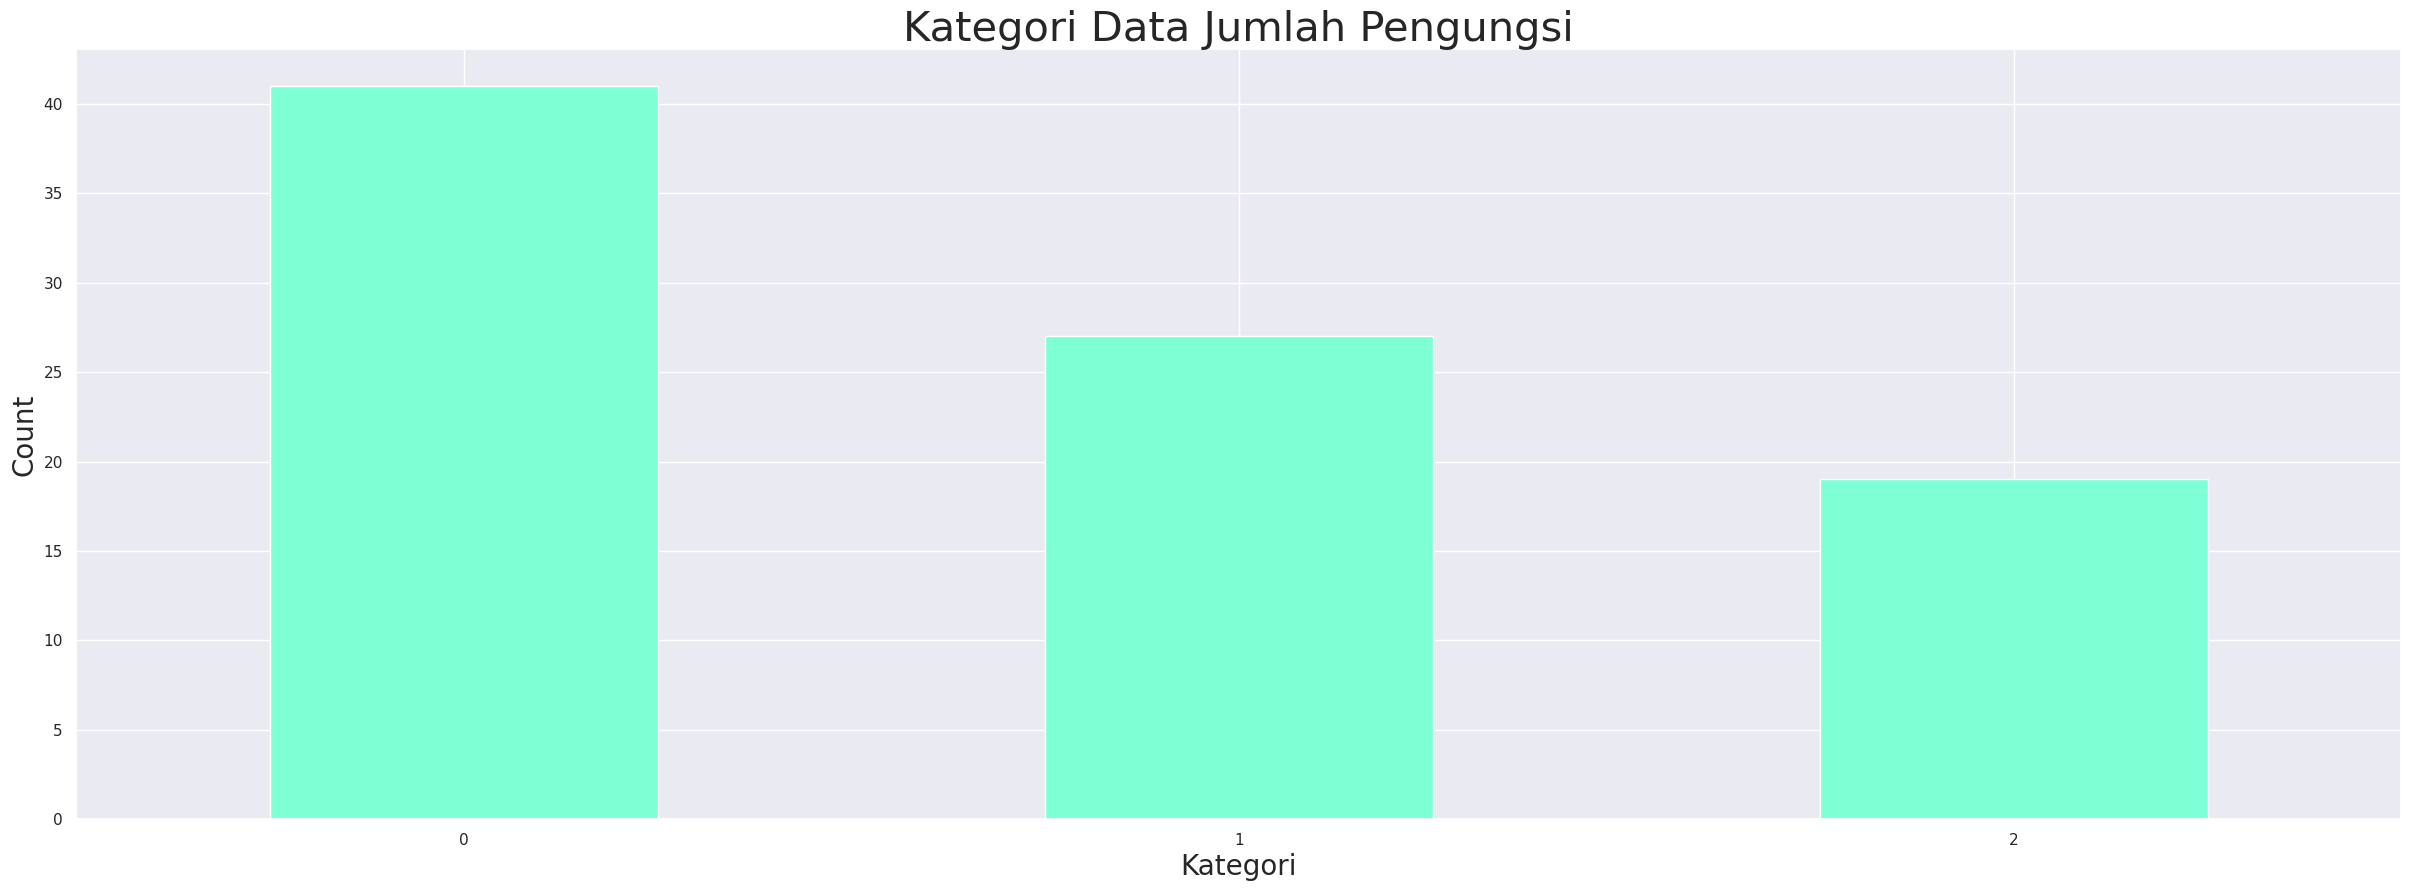

In [33]:
plt.figure(figsize=(30,10))
plt.title(col, fontsize = 30)
data_kategorikal.value_counts().plot(kind= 'bar', rot = 0, color = 'aquamarine')
plt.title('Kategori Data Jumlah Pengungsi', fontsize = 30)
plt.xlabel('Kategori', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

# Pembuatan Model XGBoost Classifier

In [34]:
list(df)

['Time',
 'rain_sum (mm)',
 'temperature_2m_mean (°C)',
 'apparent_temperature_mean (°C)',
 'windgusts_10m_max (km/h)',
 'winddirection_10m_dominant (°)',
 'lama_genangan',
 'jumlah_jiwa_pengungsi_tertinggi',
 'ketinggian_air_mean']

In [35]:
from sklearn.model_selection import train_test_split

x_data = df.drop(columns = ['Time', 'jumlah_jiwa_pengungsi_tertinggi'])
X_train, X_test, y_train, y_test = train_test_split(x_data, data_kategorikal, test_size=0.2, random_state = 42)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

model = XGBClassifier()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    scoring='accuracy',
    cv=5,
    n_iter=10,
    random_state=42
)

# Melakukan hyperparameter tuning
random_search.fit(X_train, y_train)

print("Kombinasi Hyperparameter Terbaik: ", random_search.best_params_)

Kombinasi Hyperparameter Terbaik:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [37]:
model = XGBClassifier(**random_search.best_params_)

In [38]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

print (report)

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.67      0.57         6
           2       1.00      0.57      0.73         7

    accuracy                           0.67        18
   macro avg       0.72      0.68      0.68        18
weighted avg       0.74      0.67      0.68        18



In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6666666666666666

# SVC Model

In [41]:
from sklearn.model_selection import train_test_split

x_data = df.drop(columns = ['Time', 'jumlah_jiwa_pengungsi_tertinggi'])
X_train, X_test, y_train, y_test = train_test_split(x_data, data_kategorikal, test_size=0.2, random_state = 42)

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

hyperparameters = {
    'C': uniform(loc=0, scale=10),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

svc = SVC()

random_search = RandomizedSearchCV(estimator=svc, param_distributions=hyperparameters,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print (best_params)

{'C': 3.745401188473625, 'gamma': 'scale', 'kernel': 'poly'}


In [43]:
best_svc = SVC(**best_params)

In [44]:
best_svc.fit(X_train, y_train)

y_pred = best_svc.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.60      0.50      0.55         6
           2       1.00      0.86      0.92         7

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.71        18
weighted avg       0.75      0.72      0.73        18



In [45]:
accuracy_score(y_test, y_pred)

0.7222222222222222

# Confussion Matrix

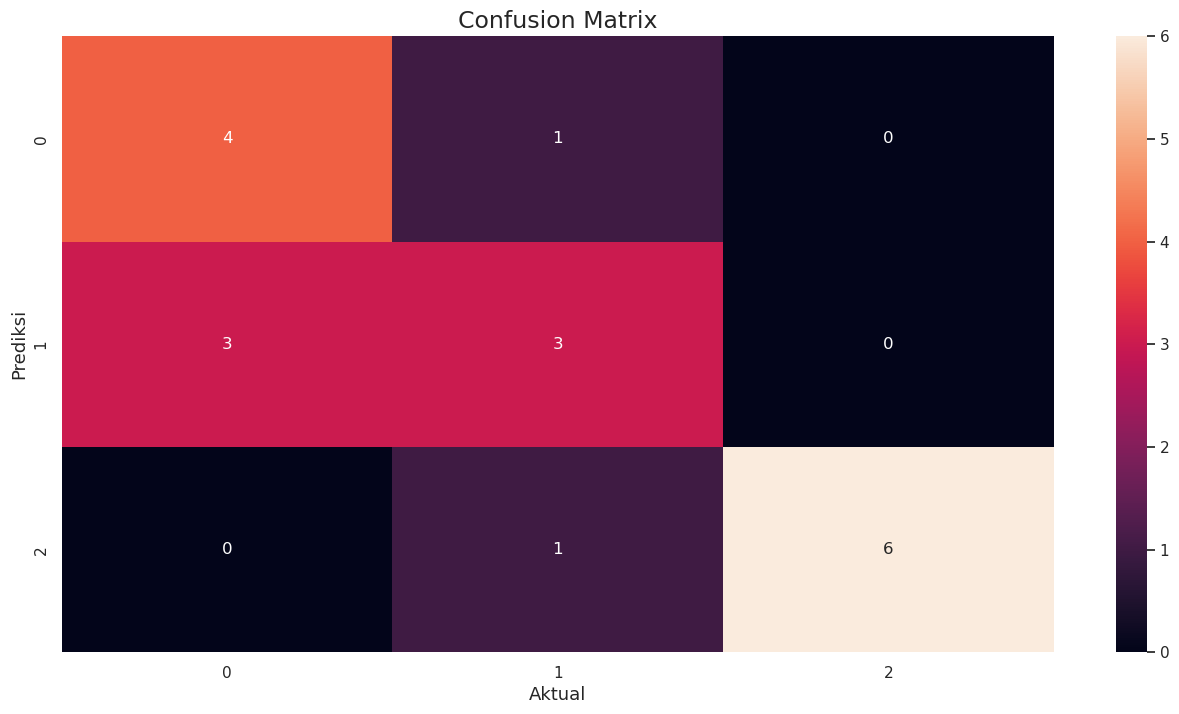

In [46]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='.0f')
plt.ylabel('Prediksi',fontsize=13)
plt.xlabel('Aktual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Terima kasih

Saya Budiman